In [1]:
%%capture
!pip install pdpbox

In [2]:
from pdpbox import pdp
from sklearn.datasets import load_wine
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Import Data

In [3]:
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='wine_class')

In [5]:
# Add names to classes
wine_regions = {0: 'liguria',
                1: 'piemonte',
                2: 'veneto'}
y = y.apply(lambda x: wine_regions[x])

In [6]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
y.head()

0    liguria
1    liguria
2    liguria
3    liguria
4    liguria
Name: wine_class, dtype: object

# Train-test Split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline

In [9]:
print('Baseline Accuracy Score:', y_train.value_counts(normalize=True).max())

Baseline Accuracy Score: 0.4014084507042254


# Build Model

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Metrics

In [11]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 1.0
Validation Accuracy: 0.9444444444444444


In [12]:
print('Validation Classification Report')
print(classification_report(y_val, model.predict(X_val)))

Validation Classification Report
              precision    recall  f1-score   support

     liguria       1.00      0.93      0.96        14
    piemonte       0.88      1.00      0.93        14
      veneto       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# Communication (PDP)

What is the relationship between the `'flavanoids'` feature and our models classification predictions?



## Using `pdpbox`

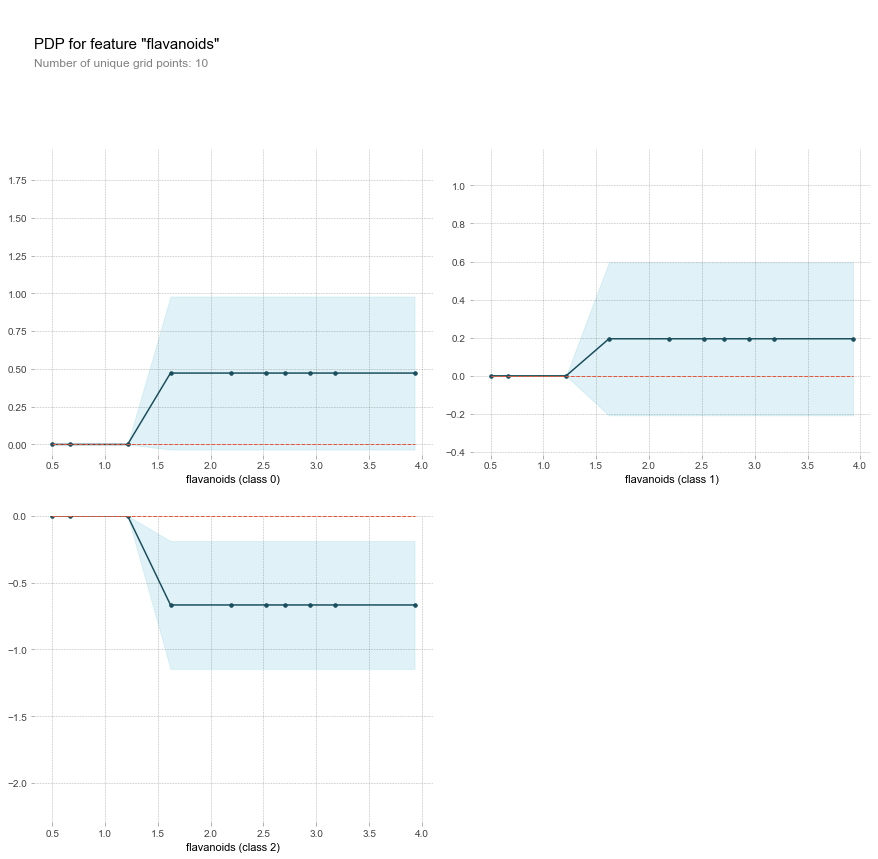

In [13]:
feature = 'flavanoids'
pdp_dist = pdp.pdp_isolate(model=model, 
                           dataset=X_val, 
                           model_features=X_val.columns, 
                           feature=feature)
pdp.pdp_plot(pdp_dist, feature);

**Question from Q&A:** How do we know what `'class 0'`, `'class 1'`, and `'class 2`' correspond to?

**Answer:** We have to get that information from the predictor.

In [14]:
list(enumerate(model.classes_))

[(0, 'liguria'), (1, 'piemonte'), (2, 'veneto')]

## Using `sklearn`

In `sklearn`, you make one pdp plot at a time, specifying which class you're interested in using the `target` argument.  

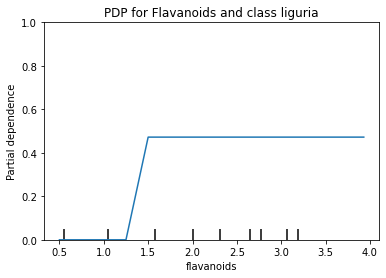

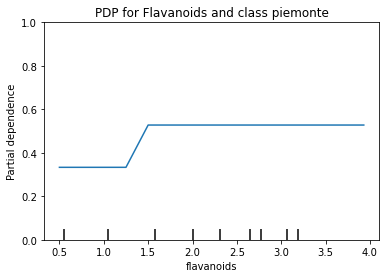

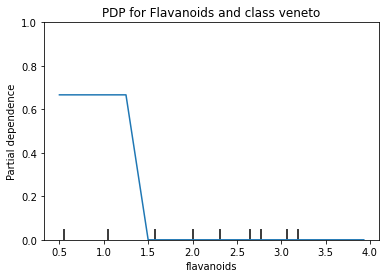

In [15]:
feature = ['flavanoids']

for t in model.classes_:
  plot_partial_dependence(model, X_val, feature, target=t)
  plt.ylim((0,1))
  plt.title(f'PDP for Flavanoids and class {t}')